<a href="https://colab.research.google.com/github/Yesi0/an-lisis-riesgo-relativo-crediticio/blob/main/Copia_de_proyecto3_hito2_y_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hito 2


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
pd.read_csv('dummies_score.csv')

,user_id,default_flag,age_dummy,debt_ratio_dummy,dependents_dummy,delayed_payment_dummy,salary_dummy,loans_dummy,uso_credito_dummy,total_score,clasificacion
0,23504,0,0,0,0,0,0,1,0,2,Buen pagador
1,5537,0,0,0,0,0,0,1,0,2,Buen pagador
2,11026,0,0,0,0,0,0,1,0,2,Buen pagador
3,3693,0,0,0,0,0,0,1,0,2,Buen pagador
4,33634,0,0,0,0,0,0,1,0,2,Buen pagador
...,...,...,...,...,...,...,...,...,...,...,...
35995,30409,0,1,1,1,1,1,1,1,12,Mal pagador
35996,16696,0,1,1,1,1,1,1,1,12,Mal pagador
35997,7687,0,1,1,1,1,1,1,1,12,Mal pagador
35998,12968,0,1,1,1,1,1,1,1,12,Mal pagador


In [ ]:
data = pd.read_csv('dummies_score.csv')

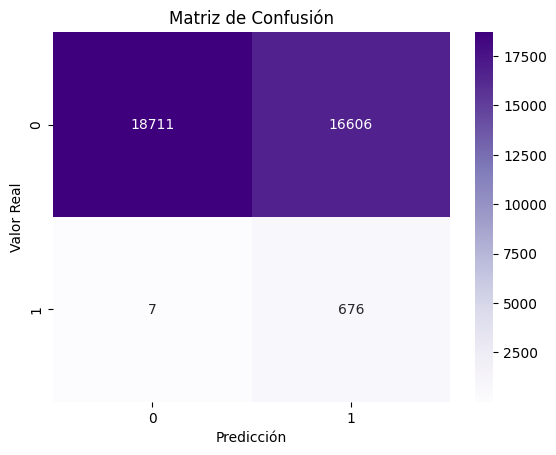

In [ ]:
# Convertir la clasificación a valores binarios para comparar con 'default_flag'
data['predicted_default_flag'] = data['clasificacion'].apply(lambda x: 1 if x == 'Mal pagador' else 0)

# Crear la matriz de confusión
cm = confusion_matrix(data['default_flag'], data['predicted_default_flag'])

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


## interpretacion Matriz de confusión
Verdaderos Positivos (TP): En el cuadrante inferior derecho (676), indica el número de casos en los que el modelo predijo correctamente el incumplimiento (etiqueta '1') y el cliente realmente incumplió.

Verdaderos Negativos (TN): En el cuadrante superior izquierdo (18711), muestra el número de casos en los que el modelo predijo correctamente la no ocurrencia del evento (etiqueta '0'), es decir, el cliente no incumplió.

Falsos Positivos (FP): En el cuadrante superior derecho (16606), refleja los casos en los que el modelo predijo incorrectamente que habría un incumplimiento (etiqueta '1'), pero el cliente no incumplió. Esto también se conoce como "error tipo I" o "falsa alarma".

Falsos Negativos (FN): En el cuadrante inferior izquierdo (7), muestra los casos en los que el modelo no predijo el incumplimiento (etiqueta '0'), pero el cliente sí incumplió. Esto se conoce como "error tipo II" y puede ser particularmente costoso en el contexto financiero.

Interpretación:
Exactitud (Accuracy): El modelo parece ser bastante preciso en la predicción de no incumplimientos, pero no tan preciso en la predicción de incumplimientos, dada la gran cantidad de Falsos Positivos.

Sensibilidad (Recall): La sensibilidad es alta, como lo indica el pequeño número de Verdaderos Positivos (676) comparado con los Falsos Negativos (7), lo que significa que el modelo puede ser  bueno detectando los incumplimientos que realmente ocurren.

Especificidad: La especificidad es relativamente alta, ya que hay muchos Verdaderos Negativos y muy pocos Falsos Negativos.

Precisión: La precisión es baja para las predicciones de incumplimiento debido a la gran cantidad de Falsos Positivos.

Valor Predictivo Negativo (VPN): Es alto, lo que significa que cuando el modelo predice que no habrá un incumplimiento, es muy probable que esté en lo correcto.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Suponiendo que 'data' es tu DataFrame y ya tiene una columna 'predicted_default_flag'
# con las predicciones de tu modelo
y_true = data['default_flag']
y_pred = data['predicted_default_flag']

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]  # Verdaderos Positivos
TN = cm[0, 0]  # Verdaderos Negativos
FP = cm[0, 1]  # Falsos Positivos
FN = cm[1, 0]  # Falsos Negativos

# Calcular Sensibilidad, Especificidad, Precisión, Tasa de Error Tipo I y II
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
precision = TP / (TP + FP)
tasa_error_tipo_I = FP / (FP + TN)  # También conocida como Falsas Alarmas
tasa_error_tipo_II = FN / (FN + TP)  # También conocida como Omisiones

# Imprimir los resultados
print(f"Sensibilidad (Recall) de los Malos Pagadores: {sensibilidad:.2f}")
print(f"Especificidad de los Buenos Pagadores: {especificidad:.2f}")
print(f"Precisión de los Malos Pagadores: {precision:.2f}")
print(f"Tasa de Error Tipo I (Falsas Alarmas): {tasa_error_tipo_I:.2f}")
print(f"Tasa de Error Tipo II (Omisiones): {tasa_error_tipo_II:.2f}")


Sensibilidad (Recall) de los Malos Pagadores: 0.99
Especificidad de los Buenos Pagadores: 0.53
Precisión de los Malos Pagadores: 0.04
Tasa de Error Tipo I (Falsas Alarmas): 0.47
Tasa de Error Tipo II (Omisiones): 0.01


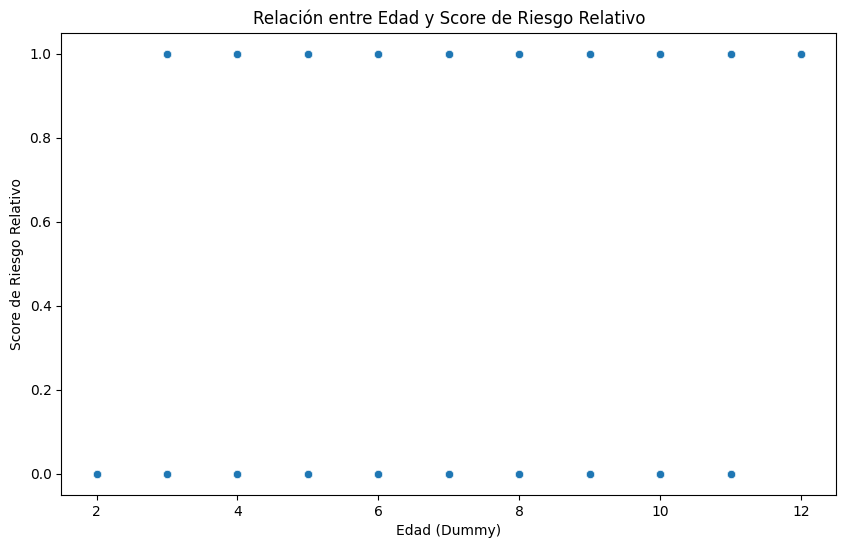

In [ ]:
# Gráfico de dispersión entre total_score y age_dummy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_score', y='age_dummy')
plt.title('Relación entre Edad y Score de Riesgo Relativo')
plt.xlabel('Edad (Dummy)')
plt.ylabel('Score de Riesgo Relativo')
plt.show()



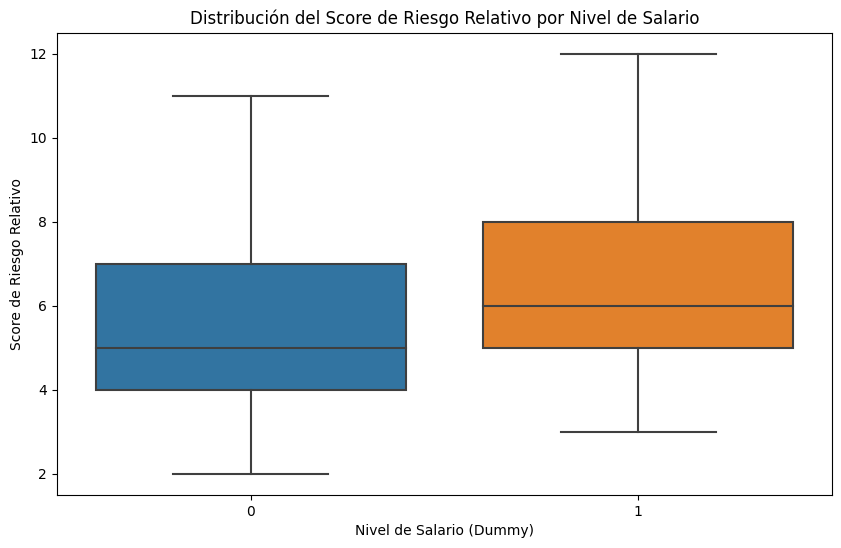

In [ ]:
# Gráfico de caja entre total_score y salary_dummy
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='salary_dummy', y='total_score')
plt.title('Distribución del Score de Riesgo Relativo por Nivel de Salario')
plt.xlabel('Nivel de Salario (Dummy)')
plt.ylabel('Score de Riesgo Relativo')
plt.show()

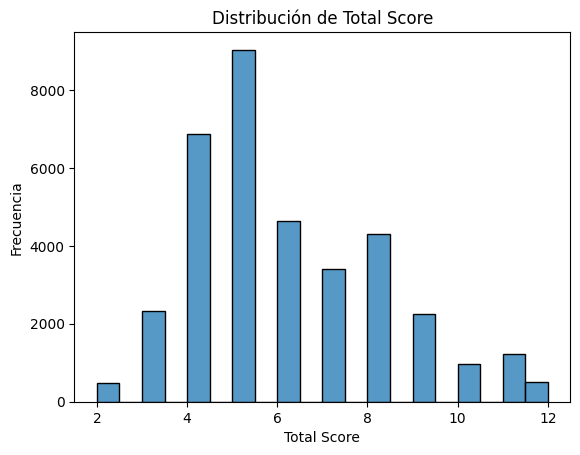

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['total_score'], bins=20, kde=False)
plt.title('Distribución de Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frecuencia')
plt.show()


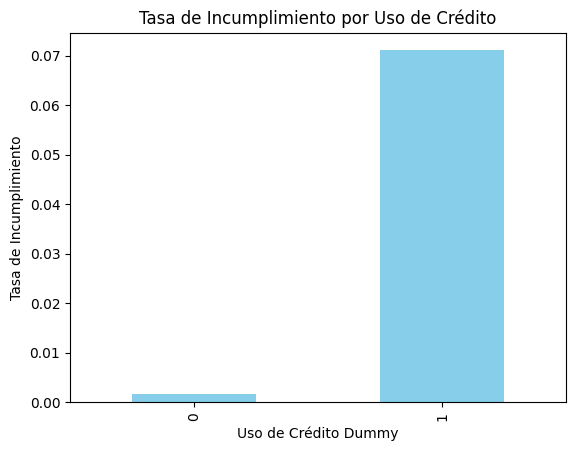

In [ ]:
# Calcular las tasas de incumplimiento por categoría de uso de crédito
default_rates = data.groupby('uso_credito_dummy')['default_flag'].mean()

# Crear un gráfico de barras
default_rates.plot(kind='bar', color='skyblue')
plt.title('Tasa de Incumplimiento por Uso de Crédito')
plt.xlabel('Uso de Crédito Dummy')
plt.ylabel('Tasa de Incumplimiento')
plt.show()


# Hito 3


In [ ]:
data.head()

,user_id,default_flag,age_dummy,debt_ratio_dummy,dependents_dummy,delayed_payment_dummy,salary_dummy,loans_dummy,uso_credito_dummy,total_score,clasificacion,predicted_default_flag
0,23504,0,0,0,0,0,0,1,0,2,Buen pagador,0
1,5537,0,0,0,0,0,0,1,0,2,Buen pagador,0
2,11026,0,0,0,0,0,0,1,0,2,Buen pagador,0
3,3693,0,0,0,0,0,0,1,0,2,Buen pagador,0
4,33634,0,0,0,0,0,0,1,0,2,Buen pagador,0


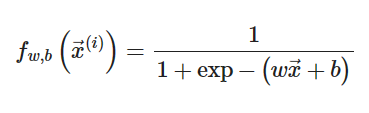

In [ ]:
import numpy as np

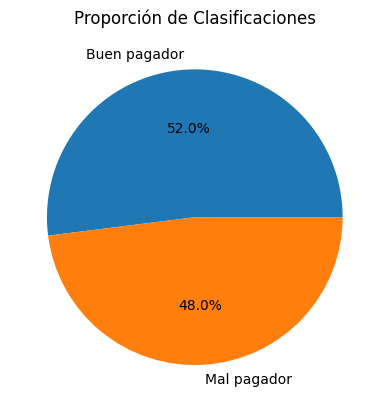

In [ ]:
# Contar las frecuencias de las clasificaciones
class_counts = data['clasificacion'].value_counts()

# Crear un gráfico de pastel
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Clasificaciones')
plt.ylabel('')
plt.show()


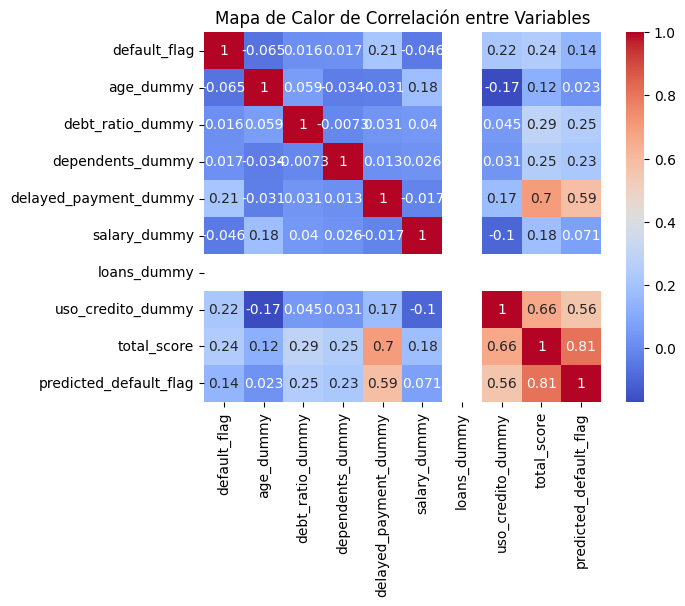

In [ ]:
# Calcular la matriz de correlación
corr_matrix = data.drop(['user_id', 'clasificacion'], axis=1).corr()

# Crear un mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


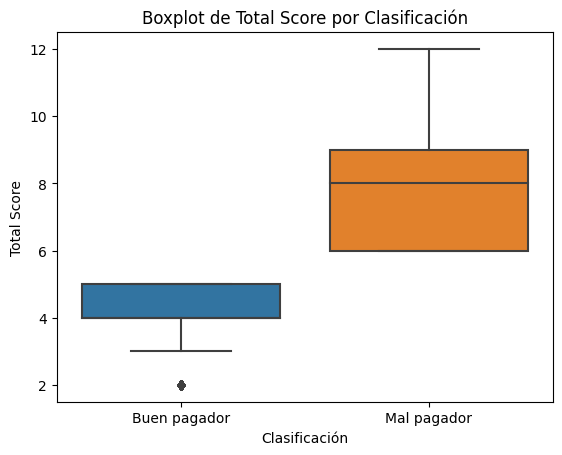

In [ ]:
# Código para un gráfico de caja
sns.boxplot(x='clasificacion', y='total_score', data=data)
plt.title('Boxplot de Total Score por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Total Score')
plt.show()


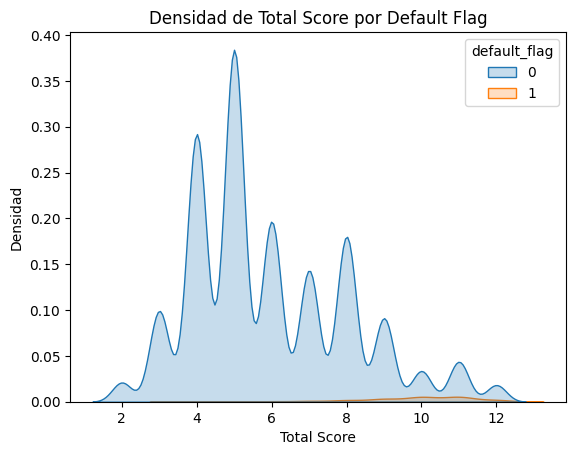

In [ ]:
# Código para un gráfico de densidad
sns.kdeplot(data=data, x='total_score', hue='default_flag', fill=True)
plt.title('Densidad de Total Score por Default Flag')
plt.xlabel('Total Score')
plt.ylabel('Densidad')
plt.show()


# Función logística

In [ ]:
from sklearn.model_selection import train_test_split

# Definiendo las variables independientes (X) y dependiente (Y)
X = data[['total_score']]
y = data['default_flag']

# Dividiendo los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28800, 1), (7200, 1), (28800,), (7200,))

Dimensiones de los Conjuntos de Entrenamiento y Prueba:

X_train.shape, X_test.shape, y_train.shape, y_test.shape: Esta línea proporciona las dimensiones de los conjuntos de entrenamiento y prueba para tanto X (variables independientes) como y (variable dependiente).
El resultado ((28800, 1), (7200, 1), (28800,), (7200,)) indica lo siguiente:
X_train y y_train (conjuntos de entrenamiento) tienen 28,800 observaciones. X_train tiene 1 característica (total_score).
X_test y y_test (conjuntos de prueba) tienen 7,200 observaciones. X_test también tiene 1 característica.
Esto significa que el conjunto de datos original ha sido dividido correctamente en conjuntos de entrenamiento y prueba, con las proporciones especificadas y las dimensiones esperadas para cada conjunto.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creando una instancia del modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# El modelo está entrenado. A continuación, lo utilizaremos para hacer predicciones en el conjunto de prueba
# Pero primero, vamos a obtener los coeficientes del modelo para comprender su funcionamiento
intercept = logistic_model.intercept_[0]
coefficient = logistic_model.coef_[0][0]

intercept, coefficient


(-9.727249631715363, 0.7318504538880949)

Creación de una Instancia del Modelo de Regresión Logística:

logistic_model = LogisticRegression(random_state=42): Se crea una instancia del modelo de regresión logística. El parámetro random_state=42 asegura que el proceso de entrenamiento del modelo sea reproducible.
Entrenamiento del Modelo:

logistic_model.fit(X_train, y_train): El modelo se entrena utilizando el conjunto de entrenamiento (X_train y y_train). fit es el método que aplica el algoritmo de regresión logística a los datos proporcionados.
Obtener los Coeficientes del Modelo:

intercept = logistic_model.intercept_[0]: Se extrae el término de intercepción (también conocido como sesgo o bias) del modelo. Este valor es la constante que se añade a la combinación lineal de las características para obtener la probabilidad logarítmica.
coefficient = logistic_model.coef_[0][0]: Se extrae el coeficiente de la característica "total_score". Este coeficiente muestra cómo afecta un cambio en "total_score" a la probabilidad logarítmica de la variable dependiente (en este caso, "default_flag").
Resultados del Intercepto y Coeficiente:

El resultado (-9.727249631715363, 0.7318504538880949) indica que el intercepto del modelo es aproximadamente -9.7272, y el coeficiente para "total_score" es aproximadamente 0.7318.
Un intercepto negativo grande (-9.7272) sugiere que, cuando "total_score" es 0, la probabilidad de incumplimiento es baja. Esto es intuitivo, ya que un puntaje de 0 indicaría el menor riesgo de incumplimiento según el modelo.
Interpretación: La probabilidad logarítmica de incumplimiento (default_flag=1) aumenta en 0.7318 unidades por cada unidad que aumenta el "total_score". El intercepto negativo indica el valor de log-odds de incumplimiento cuando "total_score" es cero.
Coeficiente para "total_score" (0.7318):

El coeficiente positivo indica que hay una relación directa entre "total_score" y la probabilidad de incumplimiento. Es decir, a medida que el "total_score" aumenta, también lo hace la probabilidad de incumplimiento.
En resumen, este código configura, entrena y extrae parámetros clave de un modelo de regresión logística que predice el "default_flag" basado en el "total_score". El modelo indica una relación positiva entre "total_score" y la probabilidad de incumplimiento.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Haciendo predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calculando la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Generando la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculando otras métricas importantes (precisión, recall, f1-score)
class_report = classification_report(y_test, y_pred)

# Calculando el área bajo la curva ROC (AUC)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, conf_matrix, class_report, roc_auc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9804166666666667,
 array([[7059,    0],
        [ 141,    0]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      7059\n           1       0.00      0.00      0.00       141\n\n    accuracy                           0.98      7200\n   macro avg       0.49      0.50      0.50      7200\nweighted avg       0.96      0.98      0.97      7200\n',
 0.9204797657836333)

In [ ]:
# Calculando el informe de clasificación con el parámetro zero_division establecido en 1
class_report_zero_division_handled = classification_report(y_test, y_pred, zero_division=1)

class_report_zero_division_handled


'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99      7059\n           1       1.00      0.00      0.00       141\n\n    accuracy                           0.98      7200\n   macro avg       0.99      0.50      0.50      7200\nweighted avg       0.98      0.98      0.97      7200\n'

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Calculando precisión, recall y f1-score para cada clase
metrics = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

# Creando un DataFrame para mostrar los resultados de forma más ordenada
metrics_df = pd.DataFrame({
    'Class': ['0 (No Default)', '1 (Default)'],
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-Score': metrics[2],
    'Support': metrics[3]
})

metrics_df.set_index('Class', inplace=True)
metrics_df


,Precision,Recall,F1-Score,Support
Class,,,,
0 (No Default),0.980417,1.0,0.990112,7059
1 (Default),1.000000,0.0,0.000000,141


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


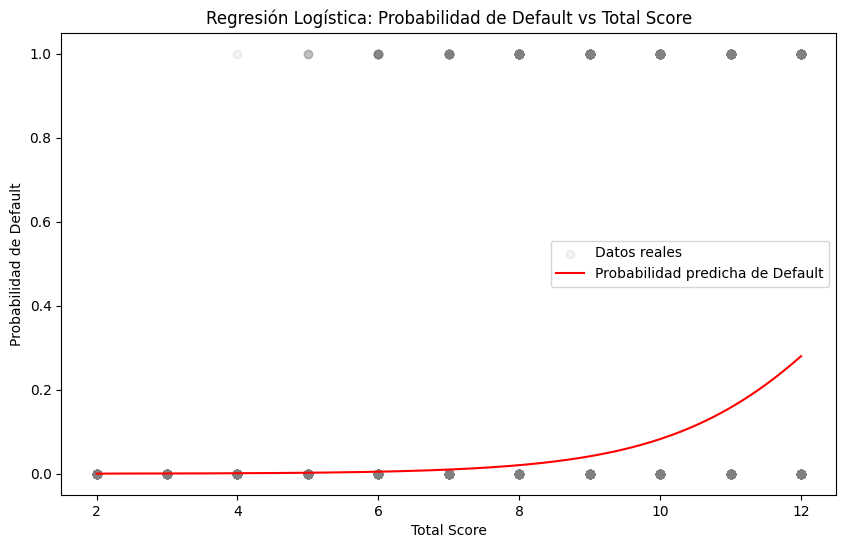

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creando un rango de valores para "total_score" para trazar la curva de probabilidad
score_range = np.linspace(data['total_score'].min(), data['total_score'].max(), 300)

# Calculando las probabilidades predichas para cada valor en el rango de "total_score"
probabilities = logistic_model.predict_proba(score_range.reshape(-1, 1))[:, 1]

# Graficando
plt.figure(figsize=(10, 6))

# Puntos de datos reales
plt.scatter(data['total_score'], data['default_flag'], alpha=0.1, color='gray', label='Datos reales')

# Curva de probabilidad de regresión logística
plt.plot(score_range, probabilities, color='red', label='Probabilidad predicha de Default')

# Etiquetas y título
plt.title('Regresión Logística: Probabilidad de Default vs Total Score')
plt.xlabel('Total Score')
plt.ylabel('Probabilidad de Default')
plt.legend()

plt.show()


La curva muestra que para valores bajos de "total_score", la probabilidad de incumplimiento es cercana a cero. A medida que "total_score" aumenta, la probabilidad de incumplimiento aumenta de manera no lineal y se vuelve más pronunciada después de un cierto punto en el eje X (alrededor de "total_score" = 8).

Interpretación del Gráfico:
Relación con "total_score": La forma de la curva es típica de la regresión logística, donde la relación entre la variable independiente y la probabilidad logarítmica de la variable dependiente es sigmoidal. Esto significa que hay una tasa de cambio más rápida de la probabilidad en el rango medio de los valores de "total_score", mientras que los cambios son más graduales en los extremos inferiores y superiores de la escala de "total_score".

Riesgo de Incumplimiento: El modelo sugiere que los individuos con un "total_score" más alto tienen una mayor probabilidad de incumplimiento, lo cual es consistente con la interpretación que un puntaje más alto implica un mayor riesgo.

Implicaciones Prácticas:
Evaluación de Riesgo: La curva puede ser utilizada  a determinar umbrales para la toma de decisiones, como la aprobación de préstamos o la asignación de tasas de interés.

Predicción de Incumplimiento: En la práctica, la curva puede ser usada para predecir la probabilidad de que un cliente incumpla en función de su "total_score". Por ejemplo, un banco podría decidir que un cliente con un "total_score" superior a 10 tiene un riesgo demasiado alto y podría requerir garantías adicionales o negar un préstamo.

Limitaciones y Consideraciones Adicionales:
Desbalance de Datos: La concentración de puntos en las líneas de probabilidad 0 y 1 sugiere que podría haber desequilibrio en las clases de la variable de incumplimiento. Si hay muchos más casos de no incumplimiento que de incumplimiento, el modelo puede estar sesgado y sería prudente considerar técnicas para manejar el desbalance de clases.


En resumen, el gráfico visualiza cómo el modelo de regresión logística estima la probabilidad de incumplimiento en función de un único predictor, "total_score", y sugiere un riesgo creciente de incumplimiento a medida que el "total_score" aumenta.